In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data
df = pd.read_csv("h1b_kaggle.csv", index_col = 0)

/Users/jkyung/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
#Visually Inspect for missing values
df.tail()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002458 entries, 1 to 3002458
Data columns (total 10 columns):
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), object(6)
memory usage: 252.0+ MB


In [5]:
#getting rid of missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877765 entries, 1 to 3002445
Data columns (total 10 columns):
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), object(6)
memory usage: 241.5+ MB


In [6]:
#see how much data we have lost
kept_data = float(2877765/3002458)
print("Percentage kept: " + str(kept_data * 100) + "%")
#only lost about 5% which is good. Can move on.

Percentage kept: 95.84696938308545%


In [7]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [8]:
#change year to string and get rid of the ".0"
df.YEAR = df.YEAR.astype(str).str[:4]
df.YEAR.head()

1    2016
2    2016
3    2016
4    2016
5    2016
Name: YEAR, dtype: object

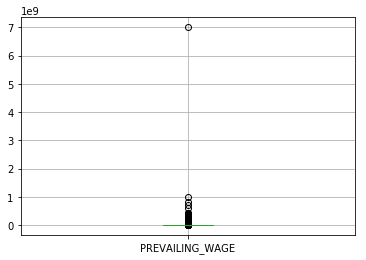

In [9]:
#check for outliers in prevailing_wage
df.boxplot(column = 'PREVAILING_WAGE')
plt.show()

In [10]:
#Clearly there is at least one outlier. Let's check the max/min
df.PREVAILING_WAGE.describe()

count    2.877765e+06
mean     1.451666e+05
std      5.307856e+06
min      0.000000e+00
25%      5.460000e+04
50%      6.512500e+04
75%      8.151500e+04
max      6.997607e+09
Name: PREVAILING_WAGE, dtype: float64

In [11]:
'''
Seems weird to have someone earn 7 billions of dollars for a H1B visa position, and for someone to earn nothing either.
Let's get rid of these two and work with dataset in between.
'''
df = df[(df.PREVAILING_WAGE > 0) & (df.PREVAILING_WAGE < 6000000000)]
df.PREVAILING_WAGE.describe()

count    2.877742e+06
mean     1.427362e+05
std      3.340458e+06
min      1.516000e+01
25%      5.460000e+04
50%      6.512500e+04
75%      8.151500e+04
max      1.007814e+09
Name: PREVAILING_WAGE, dtype: float64

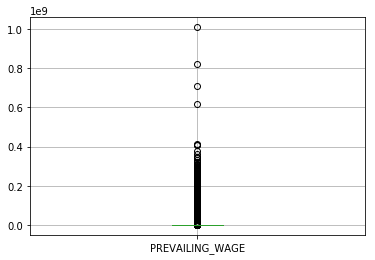

In [12]:
#Looks better
df.boxplot(column = 'PREVAILING_WAGE')
plt.show()

In [18]:
#saw some of the same words either in all lower case or all upper case, so let's make it consistent.
df.SOC_NAME = [x.upper() for x in df.SOC_NAME]

In [19]:
#save cleaned file
df.to_csv('h1b_kaggle_clean.csv')